In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training images shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test images shape:  (60000, 28, 28)
Test images shape:  (60000, 28, 28)


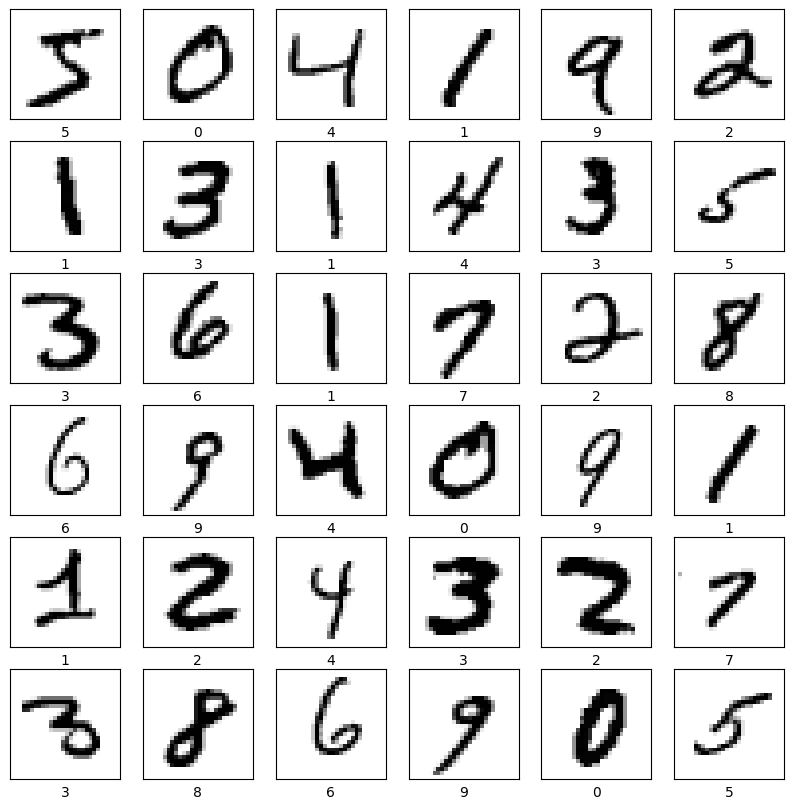

In [4]:
print('Training images shape: ', train_images.shape)
print('Training labels shape: ', train_labels.shape)
print('Test images shape: ', train_images.shape)
print('Test images shape: ', train_images.shape)

# Plotting sample images from training dataset
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [5]:
# Normalizing the pixel values between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
# Model Architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [8]:
# Training the model
training_model = model.fit(train_images,train_labels,epochs=25,validation_data=(test_images,test_labels))

Epoch 1/25


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9259 - val_loss: 0.1341 - val_accuracy: 0.9599
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1142 - accuracy: 0.9662 - val_loss: 0.1037 - val_accuracy: 0.9699
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0837 - val_accuracy: 0.9737
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0742 - val_accurac

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 805us/step - loss: 0.1124 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


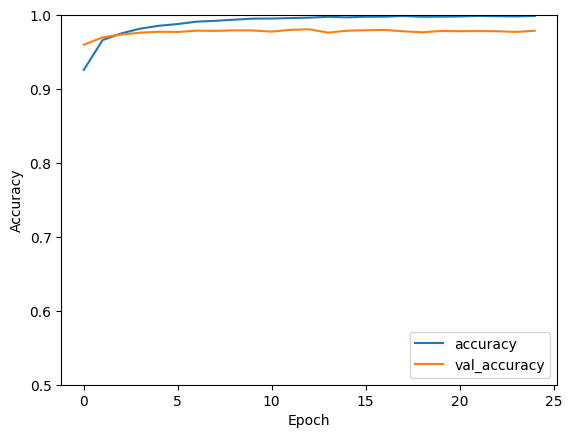

In [10]:
plt.plot(training_model.history['accuracy'], label='accuracy')
plt.plot(training_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 16ms/step
This model is probably a 0
Confidence score: 1.0


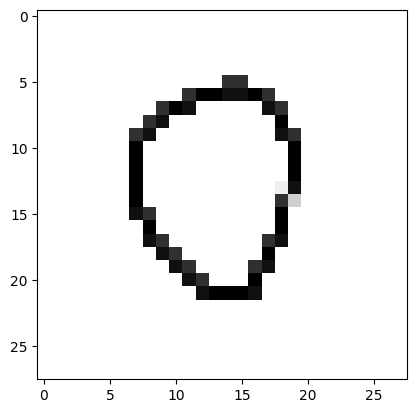

1/1 [==============================] - 0s 33ms/step
This model is probably a 1
Confidence score: 1.0


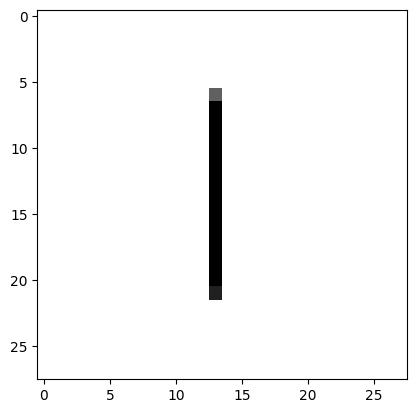

1/1 [==============================] - 0s 19ms/step
This model is probably a 2
Confidence score: 1.0


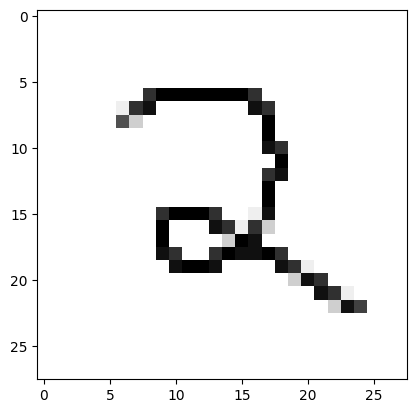

1/1 [==============================] - 0s 14ms/step
This model is probably a 3
Confidence score: 1.0


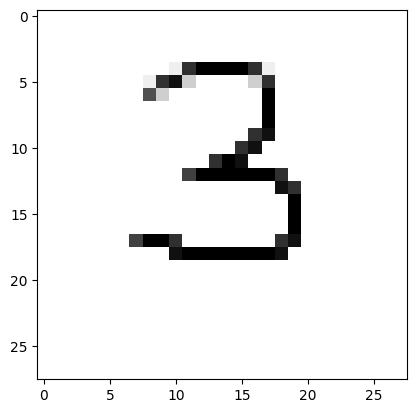

1/1 [==============================] - 0s 12ms/step
This model is probably a 4
Confidence score: 1.0


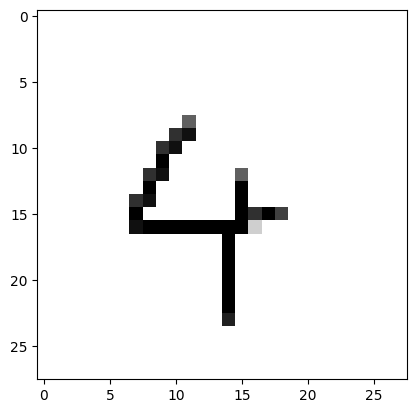

1/1 [==============================] - 0s 18ms/step
This model is probably a 5
Confidence score: 1.0


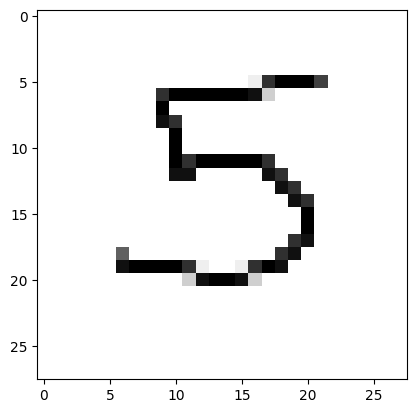

1/1 [==============================] - 0s 18ms/step
This model is probably a 6
Confidence score: 1.0


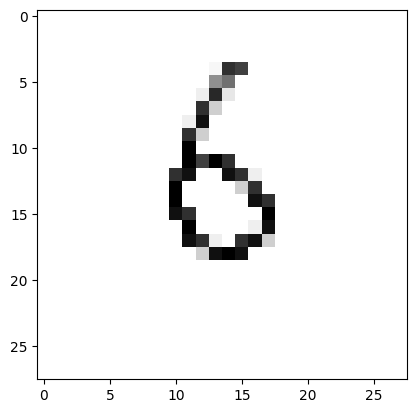

1/1 [==============================] - 0s 21ms/step
This model is probably a 7
Confidence score: 1.0


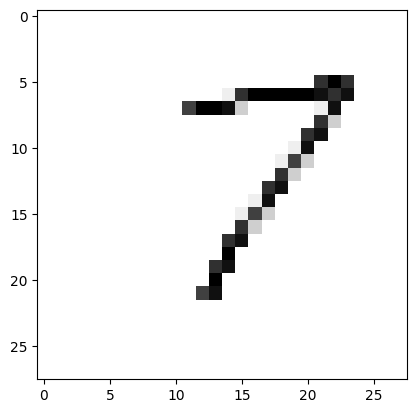

1/1 [==============================] - 0s 17ms/step
This model is probably a 8
Confidence score: 1.0


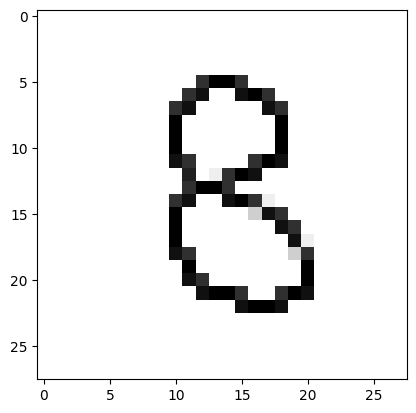

1/1 [==============================] - 0s 17ms/step
This model is probably a 9
Confidence score: 1.0


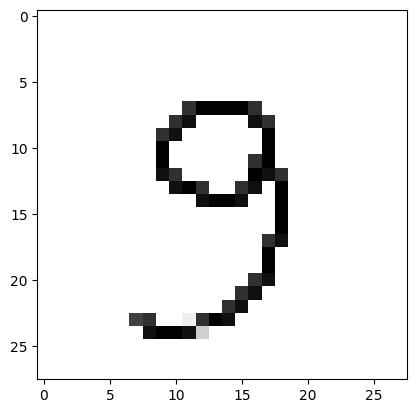

In [13]:
import os
import cv2
import numpy as np
image_number = 0
while os.path.isfile(f"digits/paint/img_{image_number}.png"):
    try:
        img = cv2.imread(f"digits/paint/img_{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This model is probably a {np.argmax(prediction)}")
        # confidence_score = np.max(prediction)
        print(f"Confidence score: {np.max(prediction)}")
        
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number+=1


In [29]:

import cv2
import numpy as np

# Load the image
image = cv2.imread('digits/normal/img_2.jpg')

# Preprocess the image
# Resize the image to match the input shape of the model (28x28 for MNIST)
resized_image = cv2.resize(image, (28, 28))

# Convert the image to grayscale if necessary
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to be between 0 and 1
normalized_image = grayscale_image / 255.0

# Expand the dimensions to match the input shape of the model (add batch dimension)
input_image = np.expand_dims(normalized_image, axis=0)

# Make predictions
predictions = model.predict(input_image)

# Interpret the predictions
predicted_class = np.argmax(predictions)
confidence_score = np.max(predictions)

# Print the predicted class and confidence score
print('Predicted class:', predicted_class)
print('Confidence score:', confidence_score)


1/1 [==============================] - 0s 20ms/step
Predicted class: 2
Confidence score: 1.0
